In [1]:
# hat tip: https://developers.google.com/codelabs/tensorflow-5-compleximages#0

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


tf.config.set_visible_devices([], 'GPU')

2022-09-03 12:13:15.495671: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib64:/usr/local/cuda-11.7/lib64/stubd:/usr/local/cuda-11.7/nvvm/lib64:/lib64:/usr/lib64:/usr/local/torque-6.1.1.1/lib:/usr/local/anaconda3-2021.11/lib
2022-09-03 12:13:15.495723: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-03 12:13:15.495760: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hi01.sciclone.wm.edu): /proc/driver/nvidia/version does not exist


In [2]:
im_h = 500
im_w = 10000

batchSize = 8

In [3]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (6,6), activation='relu', input_shape=(im_h, im_w, 3)),
    tf.keras.layers.MaxPooling2D(4, 4),
    # The second convolution
    tf.keras.layers.Conv2D(32, (4,4), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (4,4), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])


2022-09-03 12:13:15.545443: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])


/sciclone/home20/dchendrickson01/.conda/envs/TFGPU/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [5]:
imFolder = '/sciclone/scr10/dchendrickson01/BigPrints'

In [6]:
# All images will be rescaled by 1./255
generator = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
 
# Flow training images in batches of 128 using train_datagen generator
train_generator = generator.flow_from_directory(
        imFolder,  # This is the source directory for training images
        target_size=(im_h, im_w),  # All images will be resized to 150x150
        batch_size=batchSize,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        subset='training')


Found 151571 images belonging to 3 classes.


In [7]:
validation_generator = generator.flow_from_directory(
        imFolder,  # This is the source directory for training images
        target_size=(im_h, im_w),  # All images will be resized to 150x150
        batch_size=batchSize,
        class_mode='binary',
        subset='validation')


Found 37892 images belonging to 3 classes.


In [8]:
print(len(train_generator), len(validation_generator))

18947 4737


In [9]:
StepsNeeded=8 #len(train_generator)

In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=StepsNeeded,  
      epochs=5,
      validation_data=validation_generator,
      validation_steps=4, #len(validation_generator),
      verbose=1)


Epoch 1/5
8/8 [==============================] - 8188s 1167s/step - loss: 0.7522 - acc: 0.4219 - val_loss: 0.7096 - val_acc: 0.4626
Epoch 2/5
8/8 [==============================] - 7590s 1082s/step - loss: 0.7132 - acc: 0.4219 - val_loss: 0.6889 - val_acc: 0.5625
Epoch 3/5
8/8 [==============================] - 7553s 1076s/step - loss: 0.6928 - acc: 0.5938 - val_loss: 0.6868 - val_acc: 0.5588
Epoch 4/5
8/8 [==============================] - 7569s 1079s/step - loss: 0.6896 - acc: 0.6094 - val_loss: 0.6864 - val_acc: 0.5664
Epoch 5/5
8/8 [==============================] - 7559s 1077s/step - loss: 0.6824 - acc: 0.5938 - val_loss: 0.6885 - val_acc: 0.5650


INFO:tensorflow:Assets written to: /sciclone/scr10/dchendrickson01/BigPrintsModel3/assets


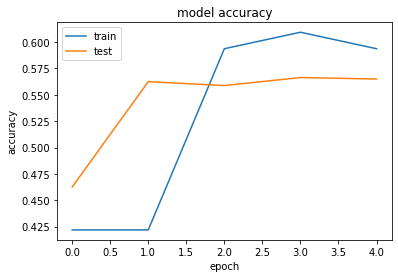

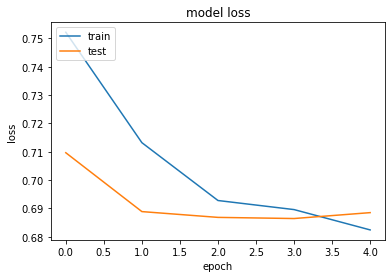

In [14]:

model.save(imFolder+'Model3/')

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(imFolder + 'ModelAccuracy3.png')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(imFolder + 'ModelLoss3.png')
plt.show()


In [13]:
history.history

{'loss': [0.752192497253418,
  0.7131978273391724,
  0.6927739381790161,
  0.6895685195922852,
  0.6823897957801819],
 'acc': [0.421875, 0.421875, 0.59375, 0.609375, 0.59375],
 'val_loss': [0.7096455097198486,
  0.6888595819473267,
  0.6868150234222412,
  0.6864100694656372,
  0.6884939074516296],
 'val_acc': [0.46257784962654114,
  0.5624670386314392,
  0.5588250756263733,
  0.5663992166519165,
  0.5650005340576172]}